In [29]:
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from skfolio import Population, RiskMeasure, RatioMeasure, PerfMeasure
from skfolio.optimization import InverseVolatility, RiskBudgeting, MeanRisk, ObjectiveFunction
from skfolio.preprocessing import prices_to_returns
import matplotlib.pyplot as plt

In [30]:
tickers = ['SPLG','SCHG', 'IAU', 'IWF', 'SCHB', 'MAGS','GOOGL', 'PLTR']

In [31]:
prices = yf.download(tickers, start='2024-11-12', end='2024-12-12')

[*********************100%***********************]  8 of 8 completed


In [32]:
prices

Price        Adj Close                                               \
Ticker           GOOGL        IAU         IWF       MAGS       PLTR   
Date                                                                  
2024-11-12  181.412079  49.080002  398.790009  52.150002  59.849998   
2024-11-13  178.675232  48.590000  398.369995  52.110001  60.700001   
2024-11-14  175.378998  48.459999  395.799988  51.459999  59.180000   
2024-11-15  172.292542  48.369999  387.549988  50.459999  65.769997   
2024-11-18  175.099319  49.290001  389.059998  51.090000  61.259998   
2024-11-19  177.916092  49.740002  393.399994  52.020000  62.980000   
2024-11-20  175.778534  50.029999  392.760010  51.689999  62.119999   
2024-11-21  167.438110  50.439999  393.720001  51.099998  61.360001   
2024-11-22  164.571381  51.080002  394.119995  51.040001  64.349998   
2024-11-25  167.458069  49.590000  394.309998  50.779999  64.650002   
2024-11-26  168.926392  49.689999  397.970001  51.450001  65.739998   
2024-11-27  169.036270  49.779999  395.339996  51.000000  66.050003   
2024-11-29  168.756592  50.250000  398.380005  51.750000  67.080002   
2024-12-02  171.293686  49.790001  401.839996  52.680000  66.389999   
2024-12-03  171.143845  49.889999  404.200012  52.959999  70.959999   
2024-12-04  174.170380  50.040001  409.940002  53.889999  69.849998   
2024-12-05  172.442368  49.669998  409.690002  54.230000  71.870003   
2024-12-06  174.510010  49.680000  412.779999  55.090000  76.339996   
2024-12-09  175.369995  50.169998  410.089996  54.910000  72.459999   
2024-12-10  185.169998  50.830002  408.980011  55.459999  70.889999   
2024-12-11  195.399994  51.299999  415.839996  57.139999  72.510002   

Price                                             Close             ...  \
Ticker           SCHB       SCHG       SPLG       GOOGL        IAU  ...   
Date                                                                ...   
2024-11-12  23.127848  27.758720  70.220001  181.619995  49.080002  ...   
2024-11-13  23.117886  27.738743  70.250000  178.880005  48.590000  ...   
2024-11-14  22.958452  27.509003  69.790001  175.580002  48.459999  ...   
2024-11-15  22.659513  26.949631  68.889999  172.490005  48.369999  ...   
2024-11-18  22.759159  27.069498  69.180000  175.300003  49.290001  ...   
2024-11-19  22.858807  27.339193  69.440002  178.119995  49.740002  ...   
2024-11-20  22.878733  27.369160  69.470001  175.979996  50.029999  ...   
2024-11-21  23.038170  27.419104  69.830002  167.630005  50.439999  ...   
2024-11-22  23.147778  27.459057  70.050003  164.759995  51.080002  ...   
2024-11-25  23.237459  27.489025  70.290001  167.649994  49.590000  ...   
2024-11-26  23.337107  27.708776  70.669998  169.119995  49.689999  ...   
2024-11-27  23.277319  27.528978  70.440002  169.229996  49.779999  ...   
2024-11-29  23.406858  27.758720  70.889999  168.949997  50.250000  ...   
2024-12-02  23.446718  27.998451  71.010002  171.490005  49.790001  ...   
2024-12-03  23.436752  28.128304  71.040001  171.339996  49.889999  ...   
2024-12-04  23.616116  28.567808  71.489998  174.369995  50.040001  ...   
2024-12-05  23.546362  28.467920  71.370003  172.639999  49.669998  ...   
2024-12-06  23.606152  28.677685  71.519997  174.710007  49.680000  ...   
2024-12-09  23.466646  28.477911  71.129997  175.369995  50.169998  ...   
2024-12-10  23.367001  28.398001  70.900002  185.169998  50.830002  ...   
2024-12-11  23.549999  28.879999  71.459999  195.399994  51.299999  ...   

Price            Open               Volume                             \
Ticker           SCHG       SPLG     GOOGL      IAU      IWF     MAGS   
Date                                                                    
2024-11-12  27.790001  70.430000  25134900  7707100  1988400   810000   
2024-11-13  27.809999  70.269997  23184000  8931800   954900   739400   
2024-11-14  27.770000  70.269997  31007500  6173000  1006500  1127500   
2024-11-15  27.299999  69.370003  32504600  5204600  232

In [33]:
prices = prices['Adj Close']

In [34]:
prices

Ticker,GOOGL,IAU,IWF,MAGS,PLTR,SCHB,SCHG,SPLG
Date,,,,,,,,
2024-11-12,181.412079,49.080002,398.790009,52.150002,59.849998,23.127848,27.758720,70.220001
2024-11-13,178.675232,48.590000,398.369995,52.110001,60.700001,23.117886,27.738743,70.250000
2024-11-14,175.378998,48.459999,395.799988,51.459999,59.180000,22.958452,27.509003,69.790001
2024-11-15,172.292542,48.369999,387.549988,50.459999,65.769997,22.659513,26.949631,68.889999
2024-11-18,175.099319,49.290001,389.059998,51.090000,61.259998,22.759159,27.069498,69.180000
2024-11-19,177.916092,49.740002,393.399994,52.020000,62.980000,22.858807,27.339193,69.440002
2024-11-20,175.778534,50.029999,392.760010,51.689999,62.119999,22.878733,27.369160,69.470001
2024-11-21,167.438110,50.439999,393.720001,51.099998,61.360001,23.038170,27.419104,69.830002
2024-11-22,164.571381,51.080002,394.119995,51.040001,64.349998,23.147778,27.459057,70.050003


## Train Test Split

In [35]:
x = prices_to_returns(prices)

In [36]:
x_train, x_test = train_test_split(x, test_size=0.75, shuffle=False)

In [37]:
x_train.head()

Ticker,GOOGL,IAU,IWF,MAGS,PLTR,SCHB,SCHG,SPLG
Date,,,,,,,,
2024-11-13,-0.015086,-0.009984,-0.001053,-0.000767,0.014202,-0.000431,-0.000720,0.000427
2024-11-14,-0.018448,-0.002675,-0.006451,-0.012474,-0.025041,-0.006897,-0.008282,-0.006548
2024-11-15,-0.017599,-0.001857,-0.020844,-0.019433,0.111355,-0.013021,-0.020334,-0.012896
2024-11-18,0.016291,0.019020,0.003896,0.012485,-0.068572,0.004398,0.004448,0.004210
2024-11-19,0.016087,0.009130,0.011155,0.018203,0.028077,0.004378,0.009963,0.003758


In [38]:
cumulative_returns = (1 + x).cumprod() -1

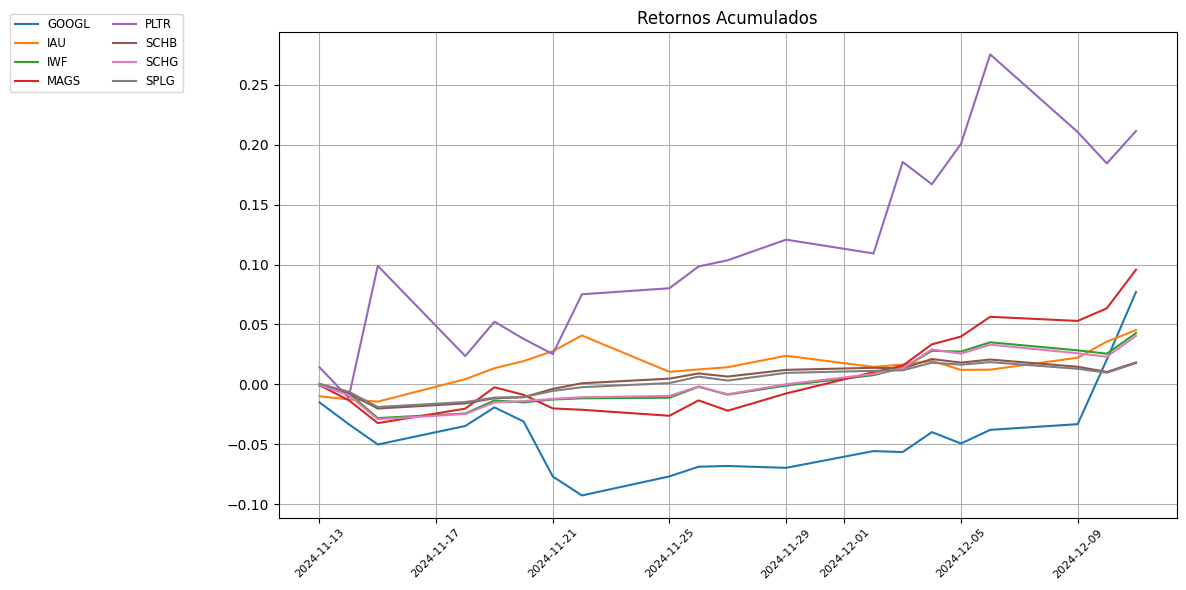

In [39]:
plt.figure(figsize=(12, 6))  # Ajustar el tamaño del gráfico si es necesario
for col in cumulative_returns.columns:
    plt.plot(cumulative_returns[col], label=col)
plt.title("Retornos Acumulados")
plt.legend(loc='upper right', bbox_to_anchor=(-0.1, 1.05), ncol=2, fontsize='small')
plt.grid(True)  # Agregar una cuadrícula para mejor visualización
# Rotar las etiquetas y ajustar el espaciado
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()
plt.show()

View Weights parce..

In [47]:
def formato(prices,weights):
    data = {'Ticker': prices.columns, 'Peso': weights}
    df = pd.DataFrame(data)
    return df.sort_values(by = 'Peso', ascending=False)

## Model RiskBudgeting

In [48]:
model_risk = RiskBudgeting(
    risk_measure = RiskMeasure.VARIANCE,
    portfolio_params=dict(name="Risk Parity - Variance"),
)

model_risk.fit(x)
model_risk.weights_

array([0.06127835, 0.18596761, 0.10669386, 0.06933576, 0.07242755,
       0.19710332, 0.10516217, 0.20203138])

In [49]:
formato(prices, model_risk.weights_)

,Ticker,Peso
7,SPLG,0.202031
5,SCHB,0.197103
1,IAU,0.185968
2,IWF,0.106694
6,SCHG,0.105162
4,PLTR,0.072428
3,MAGS,0.069336
0,GOOGL,0.061278


## Model InverseVolatility  BENCHAMRK

In [51]:
benchmark = InverseVolatility(
    portfolio_params=dict(name="Inverse Volatility")
)

benchmark.fit(x)
benchmark.weights_

array([0.04911786, 0.11130416, 0.1373413 , 0.09120428, 0.0284587 ,
       0.21659049, 0.13591337, 0.23006985])

In [52]:
formato(prices, benchmark.weights_)

,Ticker,Peso
7,SPLG,0.230070
5,SCHB,0.216590
2,IWF,0.137341
6,SCHG,0.135913
1,IAU,0.111304
3,MAGS,0.091204
0,GOOGL,0.049118
4,PLTR,0.028459


## Model MeanRisk (To go LONG)

In [54]:
model_meanrisk = MeanRisk(
    objective_function = ObjectiveFunction.MINIMIZE_RISK,
    risk_measure = RiskMeasure.VARIANCE,
    portfolio_params = dict(name = "Min Risk Variance"),
)
model_meanrisk.fit(x)
model_meanrisk.weights_

array([8.98755714e-08, 1.61321571e-01, 6.67843677e-08, 4.15801696e-08,
       4.12734992e-02, 5.72867125e-07, 6.18046932e-08, 7.97404097e-01])

In [55]:
formato(prices, model_meanrisk.weights_)

,Ticker,Peso
7,SPLG,7.974041e-01
1,IAU,1.613216e-01
4,PLTR,4.127350e-02
5,SCHB,5.728671e-07
0,GOOGL,8.987557e-08
2,IWF,6.678437e-08
6,SCHG,6.180469e-08
3,MAGS,4.158017e-08


## Model MAX RETURNS

In [71]:
model_maxreturns = MeanRisk(
    objective_function = ObjectiveFunction.MAXIMIZE_RETURN,
    portfolio_params = dict(nam = "Max Returns"),
)
model_maxreturns.fit(x)
model_maxreturns.weights_

array([3.78872461e-09, 6.64669372e-10, 6.89103141e-10, 2.13167009e-09,
       9.99999991e-01, 6.03844097e-10, 6.80574176e-10, 6.04850394e-10])

In [72]:
formato(prices, model_maxreturns.weights_)

,Ticker,Peso
4,PLTR,1.000000e+00
0,GOOGL,3.788725e-09
3,MAGS,2.131670e-09
2,IWF,6.891031e-10
6,SCHG,6.805742e-10
1,IAU,6.646694e-10
7,SPLG,6.048504e-10
5,SCHB,6.038441e-10


## Model Maximizes the Sharpe Ratio

In [58]:
model_maxsharpe = MeanRisk(
    objective_function = ObjectiveFunction.MAXIMIZE_RATIO,
    risk_measure = RiskMeasure.VARIANCE,
    portfolio_params = dict(name = "MAX SHARPE"),
)
model_maxsharpe.fit(x)
model_maxsharpe.weights_

array([5.28275243e-08, 3.60389831e-01, 1.80806158e-07, 4.91287509e-01,
       1.48320891e-01, 9.46816542e-07, 1.42783223e-07, 4.45994743e-07])

In [59]:
formato(prices, model_maxsharpe.weights_)

,Ticker,Peso
3,MAGS,4.912875e-01
1,IAU,3.603898e-01
4,PLTR,1.483209e-01
5,SCHB,9.468165e-07
7,SPLG,4.459947e-07
2,IWF,1.808062e-07
6,SCHG,1.427832e-07
0,GOOGL,5.282752e-08


## PREDICTIONS

In [60]:
pred_model_risk = model_risk.predict(x)

In [61]:
print(pred_model_risk.annualized_sharpe_ratio)

6.623550560176014


In [62]:
pred_benchmark = benchmark.predict(x)

In [63]:
print(pred_benchmark.annualized_sharpe_ratio)

5.317101926719723


In [64]:
pred_model_meanrisk = model_meanrisk.predict(x)

In [65]:
print(pred_model_meanrisk.annualized_sharpe_ratio)

5.239882793718474


In [74]:
pred_model_maxsharpe = model_maxsharpe.predict(x)

In [75]:
print(pred_model_maxsharpe.annualized_sharpe_ratio)

7.843313362530159


## COMPARE THE MODELS BROO..

In [76]:
population = Population([pred_model_risk, pred_benchmark, pred_model_meanrisk, pred_model_maxsharpe])

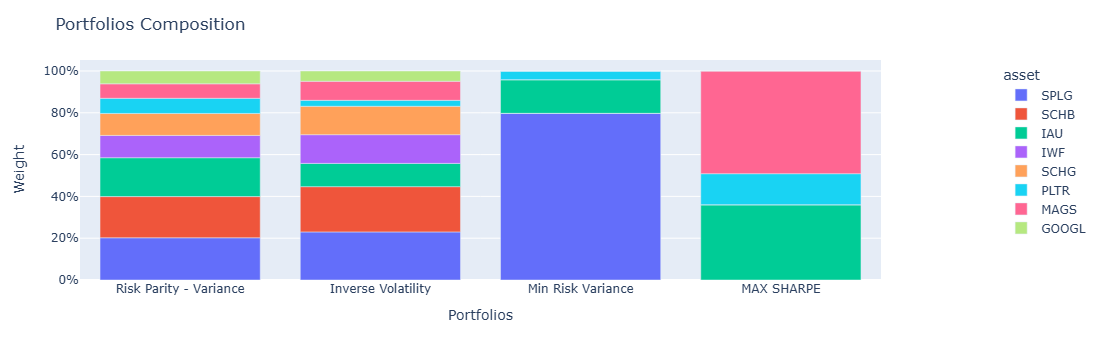

In [77]:
population.plot_composition()

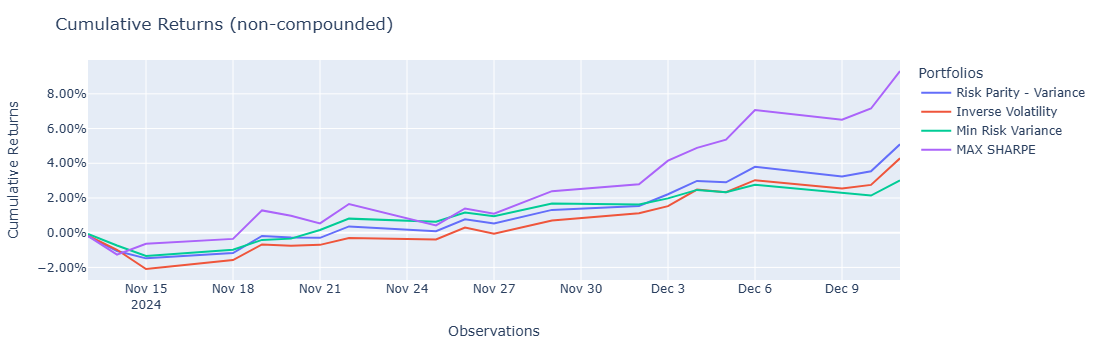

In [78]:
population.plot_cumulative_returns()

In [79]:
population.summary()

,Risk Parity - Variance,Inverse Volatility,Min Risk Variance,MAX SHARPE
Mean,0.25%,0.21%,0.15%,0.47%
Annualized Mean,64.19%,53.97%,37.95%,117.37%
Variance,0.0037%,0.0041%,0.0021%,0.0089%
Annualized Variance,0.94%,1.03%,0.52%,2.24%
Semi-Variance,0.0018%,0.0021%,0.0011%,0.0046%
Annualized Semi-Variance,0.45%,0.54%,0.28%,1.17%
Standard Deviation,0.61%,0.64%,0.46%,0.94%
Annualized Standard Deviation,9.69%,10.15%,7.24%,14.96%
Semi-Deviation,0.42%,0.46%,0.34%,0.68%
Annualized Semi-Deviation,6.69%,7.35%,5.32%,10.80%


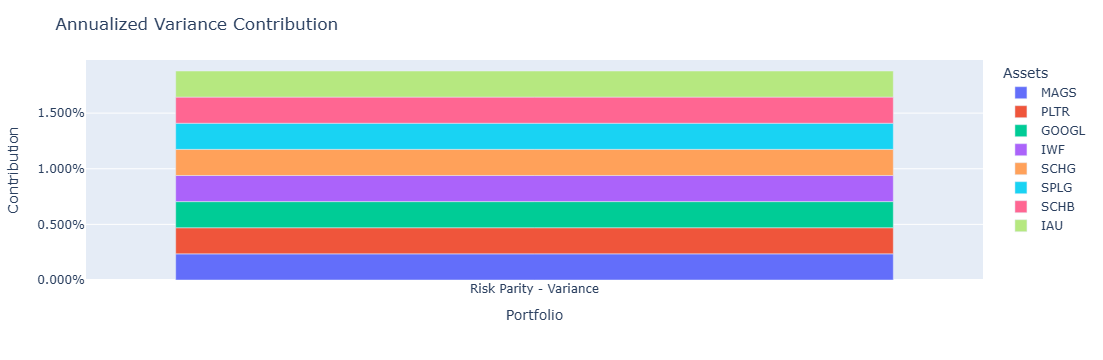

In [80]:
pred_model_risk.plot_contribution(RiskMeasure.ANNUALIZED_VARIANCE)

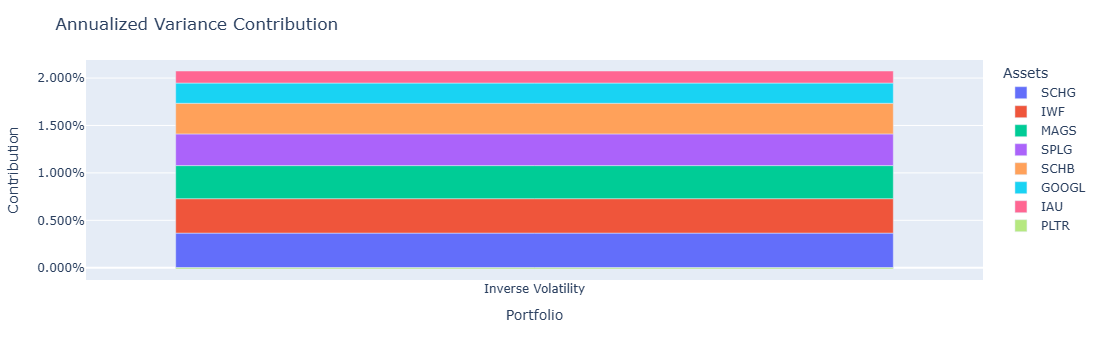

In [81]:
pred_benchmark.plot_contribution(RiskMeasure.ANNUALIZED_VARIANCE)

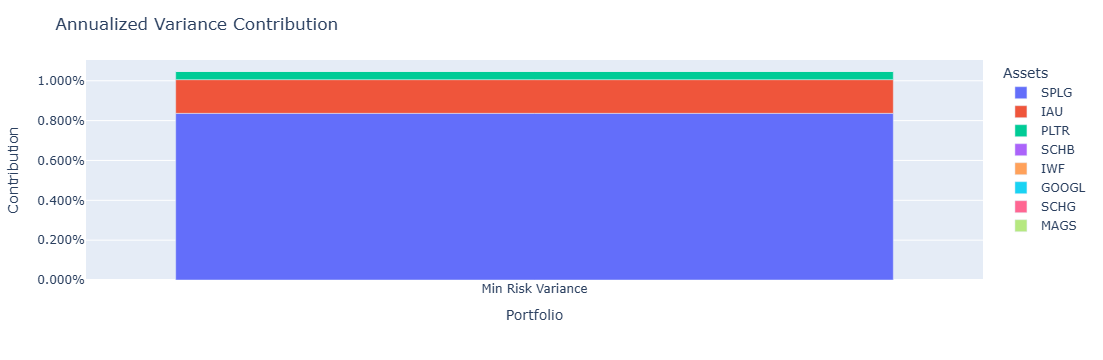

In [82]:
pred_model_meanrisk.plot_contribution(RiskMeasure.ANNUALIZED_VARIANCE)

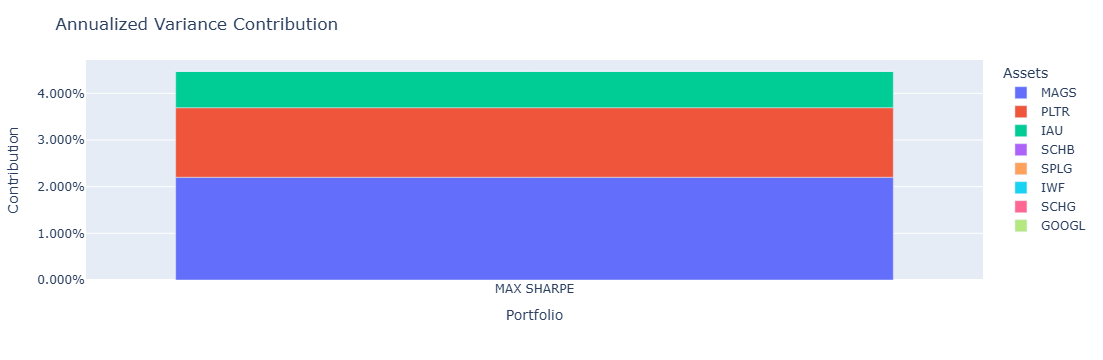

In [83]:
pred_model_maxsharpe.plot_contribution(RiskMeasure.ANNUALIZED_VARIANCE)

:)  link of chapGPT about the models means and comparations between them: https://chatgpt.com/c/675a6381-7a4c-800b-a137-ed0b016a3b02